In [2]:
import os
import pandas as pd
import matplotlib as plt
import zipfile
from transformers import BertTokenizer  , BertForSequenceClassification

import torch

import random
import matplotlib.pyplot as plt  # instead of import matplotlib as plt

from datasets import load_dataset

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

import evaluate
import numpy as np
from transformers import DataCollatorWithPadding

from transformers import DataCollatorWithPadding
import accelerate

print(accelerate.__version__)
# Define hyperparameters that were missing
# Convert DataFrame to Dataset format
from datasets import Dataset


1.2.1


In [ ]:
# Define the path to the zip file and the file to extract
zip_file_path = "US_youtube_trending_data.csv.zip"
file_to_extract = "US_youtube_trending_data.csv"

# Extract the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(file_to_extract)


with zipfile.ZipFile("USvideos.csv.zip"  , 'r') as zip_ref:
    zip_ref.extract("USvideos.csv")

df = pd.read_csv("US_youtube_trending_data.csv")
df2 = pd.read_csv("USvideos.csv")

In [11]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [12]:
df2.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


#now checking if any of these random data taken (from 2 diff sources , have any chess/coding/#maths related title)
#how ? -> check for tags. as these are very popular keywords , if present in any of the row , # #that row will be deleted

In [13]:
keywords = ['chess', 'math', 'coding', 'webdevelopment', 'computer science', 'computer']

pattern = r'\b(?:' + '|'.join(keywords) + r')\b'
filtered_df = df2[~df2['tags'].str.contains(pattern, case=False, na=False)]
filtered_df.to_csv('filtered_data.csv', index=False)

In [14]:
category_data = df2[df2['tags'].str.contains('|'.join(keywords) , case = False  , na = False)]
category_data.head()
category_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, 32 to 40898
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                651 non-null    object
 1   trending_date           651 non-null    object
 2   title                   651 non-null    object
 3   channel_title           651 non-null    object
 4   category_id             651 non-null    int64 
 5   publish_time            651 non-null    object
 6   tags                    651 non-null    object
 7   views                   651 non-null    int64 
 8   likes                   651 non-null    int64 
 9   dislikes                651 non-null    int64 
 10  comment_count           651 non-null    int64 
 11  thumbnail_link          651 non-null    object
 12  comments_disabled       651 non-null    bool  
 13  ratings_disabled        651 non-null    bool  
 14  video_error_or_removed  651 non-null    bool  
 15  descript

In [15]:
filtered_df1 = df[~df['tags'].str.contains('|'.join(keywords) , case = False  , na = False)]
filtered_df.to_csv('filtered_data1.csv')

In [16]:
category_data1 = df[df['tags'].str.contains('|'.join(keywords) , case = False  , na = False)]
category_data1.head()
category_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2254 entries, 169 to 268721
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           2254 non-null   object
 1   title              2254 non-null   object
 2   publishedAt        2254 non-null   object
 3   channelId          2254 non-null   object
 4   channelTitle       2254 non-null   object
 5   categoryId         2254 non-null   int64 
 6   trending_date      2254 non-null   object
 7   tags               2254 non-null   object
 8   view_count         2254 non-null   int64 
 9   likes              2254 non-null   int64 
 10  dislikes           2254 non-null   int64 
 11  comment_count      2254 non-null   int64 
 12  thumbnail_link     2254 non-null   object
 13  comments_disabled  2254 non-null   bool  
 14  ratings_disabled   2254 non-null   bool  
 15  description        2251 non-null   object
dtypes: bool(2), int64(5), object(9)
memory usag

In [17]:
filtered_df_main = pd.concat([filtered_df , filtered_df1] , axis = 0)

In [18]:
filtered_df_main.head()
filtered_df_main.describe()
filtered_df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307096 entries, 0 to 268786
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   video_id                307096 non-null  object 
 1   trending_date           307096 non-null  object 
 2   title                   307096 non-null  object 
 3   channel_title           40563 non-null   object 
 4   category_id             40563 non-null   float64
 5   publish_time            40563 non-null   object 
 6   tags                    307096 non-null  object 
 7   views                   40563 non-null   float64
 8   likes                   307096 non-null  int64  
 9   dislikes                307096 non-null  int64  
 10  comment_count           307096 non-null  int64  
 11  thumbnail_link          307096 non-null  object 
 12  comments_disabled       307096 non-null  bool   
 13  ratings_disabled        307096 non-null  bool   
 14  video_error_or_removed  4

In [19]:
filtered_df_main.drop_duplicates(subset=['title']).describe()


,category_id,views,likes,dislikes,comment_count,categoryId,view_count
count,6399.000000,6.399000e+03,5.445800e+04,54458.000000,5.445800e+04,48059.000000,4.805900e+04
mean,20.415690,7.751703e+05,7.334844e+04,672.955048,6.163893e+03,18.745355,1.282409e+06
std,7.211539,1.975996e+06,2.138885e+05,5306.828359,3.558544e+04,6.688984,4.155643e+06
min,1.000000,5.490000e+02,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000e+00
25%,17.000000,8.386600e+04,1.129025e+04,0.000000,8.790000e+02,17.000000,3.163730e+05
50%,24.000000,2.755840e+05,2.575000e+04,0.000000,1.967000e+03,20.000000,5.790860e+05
75%,25.000000,7.633565e+05,6.166150e+04,363.000000,4.493000e+03,24.000000,1.211266e+06
max,43.000000,4.843165e+07,7.114337e+06,629120.000000,3.400291e+06,29.000000,6.287186e+08


In [20]:
df.describe
df2.describe

<bound method NDFrame.describe of           video_id trending_date  \
0      2kyS6SvSYSE      17.14.11   
1      1ZAPwfrtAFY      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      puqaWrEC7tY      17.14.11   
4      d380meD0W0M      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutual

In [21]:
df.describe

<bound method NDFrame.describe of            video_id                                              title  \
0       3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1       M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2       J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3       kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4       VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   
...             ...                                                ...   
268782  4-uXvx5M7XA  Total solar eclipse causing tourism boost acro...   
268783  aFsfJYWpqII  Food Delivery Apps: Last Week Tonight with Joh...   
268784  pRAsQss17xs  12 Things NO-ONE Tells You About Japan | Feat....   
268785  84QeCD7y_Ds                          Buying My Dream Car At 21   
268786  SBTA3Tegacs                       Murder Drones Training Video   

                 publishedAt                 channelId  \
0       2020-08-11T

In [22]:
df2.describe

<bound method NDFrame.describe of           video_id trending_date  \
0      2kyS6SvSYSE      17.14.11   
1      1ZAPwfrtAFY      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      puqaWrEC7tY      17.14.11   
4      d380meD0W0M      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutual

In [23]:
filtered_df_main= filtered_df_main['title']
filtered_df_main.describe


<bound method NDFrame.describe of 0                        WE WANT TO TALK ABOUT OUR MARRIAGE
1         The Trump Presidency: Last Week Tonight with J...
2         Racist Superman | Rudy Mancuso, King Bach & Le...
3                          Nickelback Lyrics: Real or Fake?
4                                  I Dare You: GOING BALD!?
                                ...                        
268782    Total solar eclipse causing tourism boost acro...
268783    Food Delivery Apps: Last Week Tonight with Joh...
268784    12 Things NO-ONE Tells You About Japan | Feat....
268785                            Buying My Dream Car At 21
268786                         Murder Drones Training Video
Name: title, Length: 307096, dtype: object>

In [24]:
# Read the CSV file with more robust parameters
df_categories = pd.read_csv("title_keyword_pairs.csv",
                          sep=',',              # Use comma as delimiter
                          quoting=3,            # QUOTE_NONE: Disable quote character
                          escapechar='\\',      # Use backslash as escape character
                          encoding='utf-8',     # Specify encoding
                          on_bad_lines='skip'   # Skip problematic rows
                          )

# Alternative approach if the above doesn't work:
# df_categories = pd.read_csv("title_keyword_pairs.csv", 
#                           sep=',',
#                           quoting=csv.QUOTE_ALL,  # Quote all fields
#                           doublequote=True,       # Allow double quotes
#                           encoding='utf-8',
#                           on_bad_lines='skip'
#                           )

# Clean the data
df_categories = df_categories.dropna()  # Remove any NaN values
df_categories = df_categories.reset_index(drop=True)  # Reset index after dropping NaN

print(df_categories.info())
print("\nFirst few rows:")
print(df_categories.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    920 non-null    object
 1   Keyword  920 non-null    object
dtypes: object(2)
memory usage: 14.5+ KB
None

First few rows:
                                               Title Keyword
0  "🎦 Carlsen's magic vs Dubov's Briliance | Magn...   chess
1         "I Played England’s Youngest Chess Master"   chess
2  "🎦 Magnus Carlsen vs Hikaru Nakamura || Norway...   chess
3  "My Grandmaster Mom Sneaked in to a Chess Tour...   chess
4  "When Pragg and Magnus are in the same team! #...   chess


In [25]:
df_categories.head()

,Title,Keyword
0,"""🎦 Carlsen's magic vs Dubov's Briliance | Magn...",chess
1,"""I Played England’s Youngest Chess Master""",chess
2,"""🎦 Magnus Carlsen vs Hikaru Nakamura || Norway...",chess
3,"""My Grandmaster Mom Sneaked in to a Chess Tour...",chess
4,"""When Pragg and Magnus are in the same team! #...",chess


In [26]:
category_data1.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
169,vrYcnMWWOeI,Odd1sOut VS Alex Clark: Planning Chess Boxing ...,2020-08-07T16:06:34Z,UCsDmESjqNPukDmVnuneLrqw,It's Alex Clark,1,2020-08-12T00:00:00Z,its alex clark|itsalexclark|alex clark|itsalex...,320855,18889,180,1306,https://i.ytimg.com/vi/vrYcnMWWOeI/default.jpg,False,False,I was totally floored with how much went into ...
199,gpY9qUbPXbM,Inside Beirut After the Explosion | WSJ,2020-08-06T15:44:24Z,UCK7tptUDHh-RYDsdxO1-5QQ,Wall Street Journal,25,2020-08-12T00:00:00Z,LEBANON|BEIRUT|EXPLOSION|HOMELESS|DISPLACED|RU...,587957,6949,314,1426,https://i.ytimg.com/vi/gpY9qUbPXbM/default.jpg,False,False,Note: Additional footage also provided by: Kar...
397,vrYcnMWWOeI,Odd1sOut VS Alex Clark: Planning Chess Boxing ...,2020-08-07T16:06:34Z,UCsDmESjqNPukDmVnuneLrqw,It's Alex Clark,1,2020-08-13T00:00:00Z,its alex clark|itsalexclark|alex clark|itsalex...,334663,19493,189,1332,https://i.ytimg.com/vi/vrYcnMWWOeI/default.jpg,False,False,I was totally floored with how much went into ...
1010,y8XvQNt26KI,Unlimited Resources From Space – Asteroid Mining,2020-08-16T12:29:23Z,UCsXVk37bltHxD1rDPwtNM8Q,Kurzgesagt – In a Nutshell,27,2020-08-17T00:00:00Z,Asteroid|asteroid mining|mining|mining in spac...,2220085,202171,1319,19510,https://i.ytimg.com/vi/y8XvQNt26KI/default.jpg,False,False,The first 1000 people to use this link will ge...
1017,UYEyhB0AGlw,Crawling Down A Torpedo Tube -US NAVY Nuclear ...,2020-08-16T13:00:41Z,UC6107grRI4m0o2-emgoDnAA,SmarterEveryDay,28,2020-08-17T00:00:00Z,Smarter|Every|Day|Science|Physics|Destin|Sandl...,973510,61272,568,4293,https://i.ytimg.com/vi/UYEyhB0AGlw/default.jpg,False,False,Go to https://buyraycon.com/smarter for 15% of...


In [27]:
# Create separate dataframes for each category
chess_data = df2[df2['tags'].str.contains('chess', case=False, na=False)]
coding_data = df2[df2['tags'].str.contains('coding|webdevelopment|computer science|computer', case=False, na=False)]
math_data = df2[df2['tags'].str.contains('math', case=False, na=False)]

# Same for the second dataset (df)
chess_data1 = df[df['tags'].str.contains('chess', case=False, na=False)]
coding_data1 = df[df['tags'].str.contains('coding|webdevelopment|computer science|computer', case=False, na=False)]
math_data1 = df[df['tags'].str.contains('math', case=False, na=False)]

# Display results
print("Dataset 1 (df2) category counts:")
print(f"Chess videos: {len(chess_data)}")
print(f"Coding videos: {len(coding_data)}")
print(f"Math videos: {len(math_data)}")

print("\nDataset 2 (df) category counts:")
print(f"Chess videos: {len(chess_data1)}")
print(f"Coding videos: {len(coding_data1)}")
print(f"Math videos: {len(math_data1)}")


Dataset 1 (df2) category counts:
Chess videos: 63
Coding videos: 331
Math videos: 274

Dataset 2 (df) category counts:
Chess videos: 331
Coding videos: 707
Math videos: 1236


In [28]:
# First, add a 'source' column to distinguish between df and df2
chess_data['source'] = 'df2'
coding_data['source'] = 'df2'
math_data['source'] = 'df2'
chess_data1['source'] = 'df'
coding_data1['source'] = 'df'
math_data1['source'] = 'df'

# Add category labels
chess_data['category'] = 'chess'
coding_data['category'] = 'coding'
math_data['category'] = 'math'
chess_data1['category'] = 'chess'
coding_data1['category'] = 'coding'
math_data1['category'] = 'math'

# Combine all category dataframes
all_categories = pd.concat([
    chess_data, coding_data, math_data,
    chess_data1, coding_data1, math_data1
], ignore_index=True)

# Merge with df_categories based on title and keyword
# First, ensure title columns match
all_categories = all_categories.rename(columns={'title': 'Title'})
df_categories = df_categories.rename(columns={'Keyword': 'category'})

# Merge the dataframes
final_categorized_df = pd.merge(
    all_categories,
    df_categories[['Title', 'category']],
    on=['Title', 'category'],
    how='outer'
)

# Remove duplicates
final_categorized_df = final_categorized_df.drop_duplicates(subset=['Title', 'category'])

# Keep only 'Title' and 'category' columns
final_categorized_df = final_categorized_df[['Title', 'category']]
final_categorized_df.head()

/tmp/ipykernel_43984/1631689899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chess_data['source'] = 'df2'
/tmp/ipykernel_43984/1631689899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coding_data['source'] = 'df2'
/tmp/ipykernel_43984/1631689899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

,Title,category
0,!@#$%$#!! || Dubov vs Carlsen || Airthings Mas...,chess
9,"""""Math Whiz!"" Addition Song /// Danny Go! Kid...",math
11,"""#01 Introduction to Java Programming Tutorial...",coding
12,"""#05 🔴 RAILWAY 2024 || BEST 51 QUESTIONS by Ad...",math
13,"""#15 Compound Interest (चक्रवृद्धि ब्याज) | Co...",math


In [29]:
filtered_df_main['keyword'] = 'other'

filtered_df_main.head()

0                   WE WANT TO TALK ABOUT OUR MARRIAGE
1    The Trump Presidency: Last Week Tonight with J...
2    Racist Superman | Rudy Mancuso, King Bach & Le...
3                     Nickelback Lyrics: Real or Fake?
4                             I Dare You: GOING BALD!?
Name: title, dtype: object

In [30]:
other_df = pd.DataFrame({
    'Title' : filtered_df_main ,
    'category' : 'other'
})

other_df.head()

,Title,category
0,WE WANT TO TALK ABOUT OUR MARRIAGE,other
1,The Trump Presidency: Last Week Tonight with J...,other
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",other
3,Nickelback Lyrics: Real or Fake?,other
4,I Dare You: GOING BALD!?,other


In [31]:

# Calculate the number of samples to keep (1/1000th of the 'other' category)
num_samples_to_keep = max(1, len(other_df) // 200)

# Randomly sample the required number of rows from the 'other' category
other_df_sampled = other_df.sample(n=num_samples_to_keep, random_state=1)

# Replace the original 'other' category dataframe with the sampled one
other_df = other_df_sampled


In [32]:
df_final =  pd.concat([final_categorized_df , other_df] , ignore_index = True)
df_final = df_final.drop_duplicates(subset=['Title'])
print("Final dataset info:")
print(df_final.info())
print("\nFirst few rows:")
print(df_final.head())

Final dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 2944
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     2919 non-null   object
 1   category  2919 non-null   object
dtypes: object(2)
memory usage: 68.4+ KB
None

First few rows:
                                               Title category
0  !@#$%$#!! || Dubov vs Carlsen || Airthings Mas...    chess
1  ""Math Whiz!" Addition Song  /// Danny Go! Kid...     math
2  "#01 Introduction to Java Programming Tutorial...   coding
3  "#05 🔴 RAILWAY 2024 || BEST 51 QUESTIONS by Ad...     math
4  "#15 Compound Interest (चक्रवृद्धि ब्याज) | Co...     math


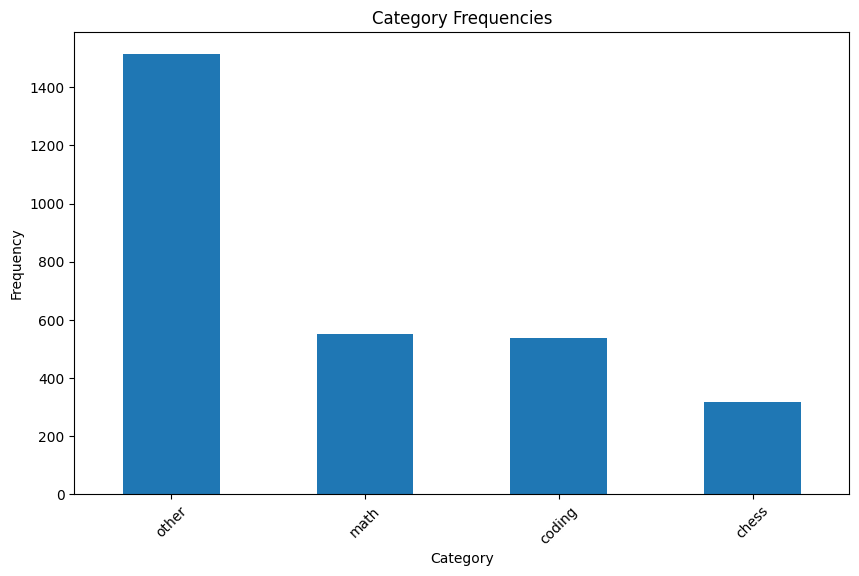

In [33]:

category_counts = df_final['category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Category Frequencies')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [35]:
model_path = "google-bert/bert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_path)

id2label = {0: "other", 1: "chess" , 2 : "coding"  , 3: "math"}
label2id = {"other": 0, "chess": 1 , "coding" : 2 , "math" : 3}
model = AutoModelForSequenceClassification.from_pretrained(model_path, 
                                                           num_labels=4, 
                                                           id2label=id2label, 
                                                           label2id=label2id,)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
#freeze all the base model params
for name, param in model.named_parameters():
   param.requires_grad = False


#unfreeze base model pooling layers
for name, param  in model.base_model.named_parameters():
   if "pooler" in name or "encoder.layer.10" in name or "encoder.layer.11" in name:
      param.requires_grad = True



In [43]:


# Convert category labels to numeric
category_mapping = {'other': 0, 'chess': 1, 'coding': 2, 'math': 3}
df_final['label'] = df_final['category'].map(category_mapping)

# Create Dataset object
dataset = Dataset.from_pandas(df_final)

# Split into train/test sets
dataset = dataset.train_test_split(test_size=0.2, seed=42)

# Create tokenization function that handles batches
def tokenize_function(examples):
    return tokenizer(examples['Title'], truncation=True, padding=True)  # Changed 'text' to 'Title'

# Apply tokenization
tokenized_dataset = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/2335 [00:00<?, ? examples/s]

Map:   0%|          | 0/584 [00:00<?, ? examples/s]

In [44]:
# load metrics
accuracy = evaluate.load("accuracy")
auc_score = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    
    # Apply softmax to get probabilities
    probabilities = np.exp(predictions) / np.exp(predictions).sum(-1, keepdims=True)
    
    # Compute ROC AUC using one-vs-rest approach
    auc_scores = []
    for i in range(4):  # For each class
        # Get binary labels (current class vs rest)
        binary_labels = (labels == i).astype(int)
        # Get probabilities for current class
        class_probs = probabilities[:, i]
        try:
            auc = auc_score.compute(prediction_scores=class_probs, references=binary_labels)['roc_auc']
            auc_scores.append(auc)
        except:
            # Handle cases where a class might not have both positive and negative samples
            auc_scores.append(0.0)
    
    # Calculate mean AUC across all classes
    mean_auc = np.round(np.mean(auc_scores), 3)
    
    # Calculate accuracy
    predicted_classes = np.argmax(predictions, axis=1)
    acc = np.round(accuracy.compute(predictions=predicted_classes, references=labels)['accuracy'], 3)
    
    return {
        "accuracy": acc,
        "mean_roc_auc": mean_auc,
        "roc_auc_per_class": {
            "other": auc_scores[0],
            "chess": auc_scores[1],
            "coding": auc_scores[2],
            "math": auc_scores[3]
        }
    }

In [46]:

# First, create the data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


training_args = TrainingArguments(
    output_dir="bert-yt_classifier",
    learning_rate=2e-5,  # Slightly higher learning rate
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,  # Increase epochs
    warmup_ratio=0.1,    # Add warmup
    weight_decay=0.01,   # Add weight decay
    logging_strategy="epoch",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",  # Specify metric to track
    greater_is_better=True,
    push_to_hub=False,
)

# Create trainer with the correct dataset name (tokenized_dataset instead of tokenized_data)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],  # Fixed dataset name
    eval_dataset=tokenized_dataset["test"],    # Fixed dataset name
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Start training
trainer.train()

1.2.1


/home/iiitd/oreki/detoxify_yt/virtual/lib/python3.12/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_43984/1461785931.py:27: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


  0%|          | 0/1460 [00:00<?, ?it/s]

{'loss': 0.2789, 'grad_norm': 2.226588487625122, 'learning_rate': 2e-05, 'epoch': 1.0}


  0%|          | 0/37 [00:00<?, ?it/s]

{'eval_loss': 0.41055795550346375, 'eval_accuracy': 0.861, 'eval_mean_roc_auc': 0.951, 'eval_roc_auc_per_class': {'other': 0.9296301524562394, 'chess': 0.9708804814594238, 'coding': 0.9679888656924148, 'math': 0.937149980820867}, 'eval_runtime': 11.7957, 'eval_samples_per_second': 49.51, 'eval_steps_per_second': 3.137, 'epoch': 1.0}
{'loss': 0.2392, 'grad_norm': 0.6316988468170166, 'learning_rate': 1.7777777777777777e-05, 'epoch': 2.0}


  0%|          | 0/37 [00:00<?, ?it/s]

{'eval_loss': 0.4171137511730194, 'eval_accuracy': 0.865, 'eval_mean_roc_auc': 0.954, 'eval_roc_auc_per_class': {'other': 0.932712215320911, 'chess': 0.9731059774942795, 'coding': 0.9702753752858138, 'math': 0.9388185654008439}, 'eval_runtime': 12.0176, 'eval_samples_per_second': 48.596, 'eval_steps_per_second': 3.079, 'epoch': 2.0}
{'loss': 0.2041, 'grad_norm': 1.833361268043518, 'learning_rate': 1.555555555555556e-05, 'epoch': 3.0}


  0%|          | 0/37 [00:00<?, ?it/s]

{'eval_loss': 0.4319022297859192, 'eval_accuracy': 0.866, 'eval_mean_roc_auc': 0.954, 'eval_roc_auc_per_class': {'other': 0.9316887822322606, 'chess': 0.9723536971444692, 'coding': 0.9711700964310568, 'math': 0.9390487149980821}, 'eval_runtime': 11.7534, 'eval_samples_per_second': 49.688, 'eval_steps_per_second': 3.148, 'epoch': 3.0}
{'loss': 0.1862, 'grad_norm': 0.7962602972984314, 'learning_rate': 1.3333333333333333e-05, 'epoch': 4.0}


  0%|          | 0/37 [00:00<?, ?it/s]

{'eval_loss': 0.4248743951320648, 'eval_accuracy': 0.863, 'eval_mean_roc_auc': 0.957, 'eval_roc_auc_per_class': {'other': 0.9398880105401844, 'chess': 0.9707237563865467, 'coding': 0.973118600258475, 'math': 0.9457805907172996}, 'eval_runtime': 11.6782, 'eval_samples_per_second': 50.008, 'eval_steps_per_second': 3.168, 'epoch': 4.0}
{'loss': 0.1736, 'grad_norm': 3.1624836921691895, 'learning_rate': 1.1111111111111113e-05, 'epoch': 5.0}


  0%|          | 0/37 [00:00<?, ?it/s]

{'eval_loss': 0.4149200916290283, 'eval_accuracy': 0.872, 'eval_mean_roc_auc': 0.958, 'eval_roc_auc_per_class': {'other': 0.9406526444569924, 'chess': 0.9733880826254584, 'coding': 0.9718659906551347, 'math': 0.9478711162255467}, 'eval_runtime': 11.8735, 'eval_samples_per_second': 49.185, 'eval_steps_per_second': 3.116, 'epoch': 5.0}
{'loss': 0.1447, 'grad_norm': 2.381532907485962, 'learning_rate': 8.888888888888888e-06, 'epoch': 6.0}


  0%|          | 0/37 [00:00<?, ?it/s]

{'eval_loss': 0.4306883215904236, 'eval_accuracy': 0.866, 'eval_mean_roc_auc': 0.959, 'eval_roc_auc_per_class': {'other': 0.9417231319405232, 'chess': 0.9732940475817321, 'coding': 0.9738343771746695, 'math': 0.9473149213655543}, 'eval_runtime': 11.6961, 'eval_samples_per_second': 49.931, 'eval_steps_per_second': 3.163, 'epoch': 6.0}
{'loss': 0.1298, 'grad_norm': 1.8414421081542969, 'learning_rate': 6.666666666666667e-06, 'epoch': 7.0}


  0%|          | 0/37 [00:00<?, ?it/s]

{'eval_loss': 0.4376494586467743, 'eval_accuracy': 0.866, 'eval_mean_roc_auc': 0.959, 'eval_roc_auc_per_class': {'other': 0.9418878223226049, 'chess': 0.9738269128295145, 'coding': 0.9719256387314843, 'math': 0.9489451476793249}, 'eval_runtime': 11.7338, 'eval_samples_per_second': 49.771, 'eval_steps_per_second': 3.153, 'epoch': 7.0}
{'loss': 0.1112, 'grad_norm': 4.108028411865234, 'learning_rate': 4.444444444444444e-06, 'epoch': 8.0}


  0%|          | 0/37 [00:00<?, ?it/s]

{'eval_loss': 0.4477379620075226, 'eval_accuracy': 0.873, 'eval_mean_roc_auc': 0.959, 'eval_roc_auc_per_class': {'other': 0.9407232260493129, 'chess': 0.97495533335423, 'coding': 0.9711104483547072, 'math': 0.9479670118910626}, 'eval_runtime': 11.7857, 'eval_samples_per_second': 49.551, 'eval_steps_per_second': 3.139, 'epoch': 8.0}
{'loss': 0.1078, 'grad_norm': 4.731178283691406, 'learning_rate': 2.222222222222222e-06, 'epoch': 9.0}


  0%|          | 0/37 [00:00<?, ?it/s]

{'eval_loss': 0.45067131519317627, 'eval_accuracy': 0.877, 'eval_mean_roc_auc': 0.959, 'eval_roc_auc_per_class': {'other': 0.9414290419725202, 'chess': 0.9756135786603142, 'coding': 0.9710706829704742, 'math': 0.9483505945531262}, 'eval_runtime': 11.767, 'eval_samples_per_second': 49.63, 'eval_steps_per_second': 3.144, 'epoch': 9.0}
{'loss': 0.1047, 'grad_norm': 5.823518753051758, 'learning_rate': 0.0, 'epoch': 10.0}


  0%|          | 0/37 [00:00<?, ?it/s]

{'eval_loss': 0.4508744776248932, 'eval_accuracy': 0.878, 'eval_mean_roc_auc': 0.959, 'eval_roc_auc_per_class': {'other': 0.9416760775456429, 'chess': 0.9760524088643701, 'coding': 0.9710309175862413, 'math': 0.9490026850786344}, 'eval_runtime': 11.7179, 'eval_samples_per_second': 49.838, 'eval_steps_per_second': 3.158, 'epoch': 10.0}
{'train_runtime': 774.8953, 'train_samples_per_second': 30.133, 'train_steps_per_second': 1.884, 'train_loss': 0.16802303105184477, 'epoch': 10.0}


TrainOutput(global_step=1460, training_loss=0.16802303105184477, metrics={'train_runtime': 774.8953, 'train_samples_per_second': 30.133, 'train_steps_per_second': 1.884, 'total_flos': 671973035260800.0, 'train_loss': 0.16802303105184477, 'epoch': 10.0})

In [4]:


model_path = "bert-yt_classifier/checkpoint-1460"
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)


model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [11]:
texts = ["This is Magnus Carlsen.", "this is Gary kasparov." , "this is terence tao." , "this is harkirat singh , from iit sr developer "]

inputs = tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

# Process outputs
logits = outputs.logits
probabilities = torch.nn.functional.softmax(logits, dim=-1)
predicted_classes = torch.argmax(probabilities, dim=-1)

# Map predicted classes to labels
label_mapping = {0: "other", 1: "chess", 2: "coding", 3: "math"}
predicted_labels = [label_mapping[int(label)] for label in predicted_classes]

print(predicted_labels)

['other', 'other', 'other', 'other']


In [21]:
#uploading the model to huggingface 
from huggingface_hub import notebook_login

notebook_login()

Token has not been saved to git credential helper.


In [25]:
# Save both model and tokenizer to the same local directory
model_save_path = "bert-yt_classifier/checkpoint-1460"
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)


model.push_to_hub("detoxifying_yt", use_auth_token=True)
tokenizer.push_to_hub("detoxifying_yt", use_auth_token=True)

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/curlyoreki/detoxifying_yt/commit/e4b611bb2f93ea9018650a2a2d2f349c5018d233', commit_message='Upload tokenizer', commit_description='', oid='e4b611bb2f93ea9018650a2a2d2f349c5018d233', pr_url=None, repo_url=RepoUrl('https://huggingface.co/curlyoreki/detoxifying_yt', endpoint='https://huggingface.co', repo_type='model', repo_id='curlyoreki/detoxifying_yt'), pr_revision=None, pr_num=None)